In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

import numpy as np

In [2]:
# Let us create some sample Simon oracles

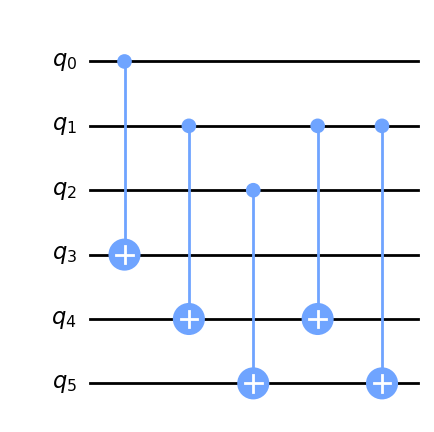

In [10]:
# Constructing Simon oracle-1

n = 3 # No. of qubits in n-qubit input register |x>
p = '110' # Secret bit-string
simon_oracle_1 = QuantumCircuit(2*n) # Another n-qubits for the bottom register |0>|0>....|0>

# First part of CX-gates
for i in range(n):
    simon_oracle_1.cx(i,i+n)

# Second part of CX-gates
i = n-1 # reads "p" from the right
while i >= 0:
    if p[i]=='1':
        k = n-i-1 # this is my control qubit for CX-gates
        j = n-1
        while j >= 0:
            if p[j]=='1':
                simon_oracle_1.cx(k,2*n-1-j) #control on k, target on those qubits of |00..> register for which corresponding bit in "p" reads "1"
            j-=1
        break
    else:
        i-=1

simon_oracle_1.draw()

In [ ]:
# Now we construct an equivalent Simon oracle for the above one
# Instead of black-circle CNOTs, we use white-circle CNOTs, i.e. CNOTs controlled by "0"

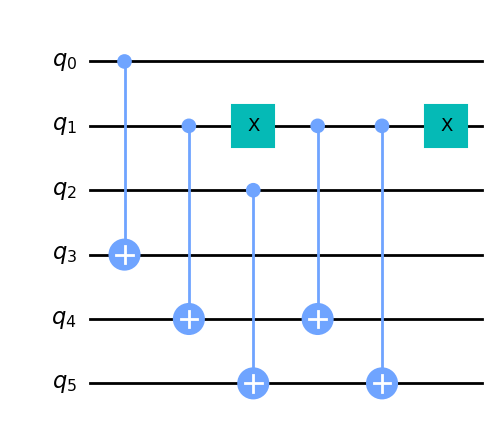

In [13]:
# Constructing Simon oracle-2

n = 3 # No. of qubits in n-qubit input register |x>
p = '110' # Secret bit-string
simon_oracle_2 = QuantumCircuit(2*n) # Another n-qubits for the bottom register |0>|0>....|0>

# First part of CX-gates
for i in range(n):
    simon_oracle_2.cx(i,i+n)

# Second part of CX-gates
i = n-1 # reads "p" from the right
while i >= 0:
    if p[i]=='1':
        k = n-i-1 # this is my control qubit for CX-gates
        simon_oracle_2.x(k) # X-gate before CNOT
        j = n-1
        while j >= 0:
            if p[j]=='1':
                simon_oracle_2.cx(k,2*n-1-j) #control on k, target on those qubits of |00..> register for which corresponding bit in "p" reads "1"
            j-=1
        simon_oracle_2.x(k) # X-gate after CNOT
        break
    else:
        i-=1

simon_oracle_2.draw()

In [15]:
# Simon oracle-1 and Simon oracle-2 are equivalent. They do the same job, i.e. they implement the same secret bit-string "p"

In [16]:
# Now we implement the Simon's Algorithm for these two oracles and check the results

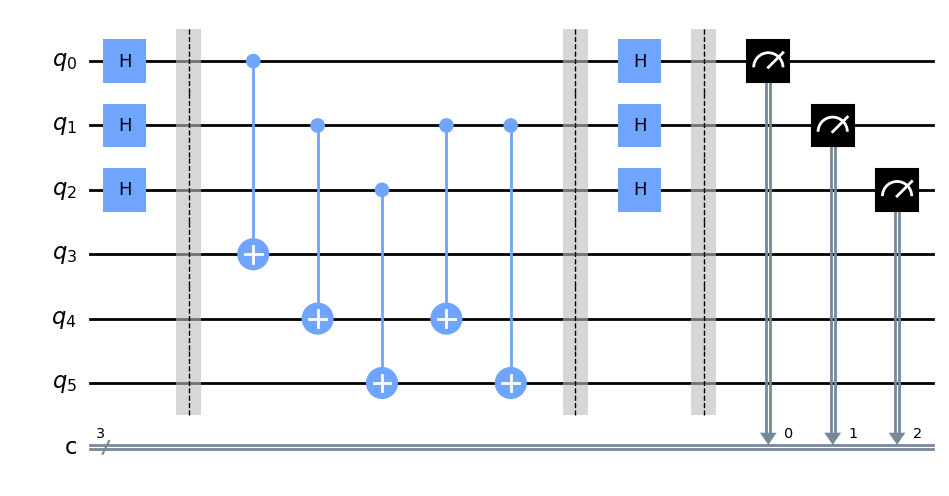

In [17]:
# Implementing Simon's algorithm for Simon oracle-1

n = 3
simon = QuantumCircuit(2*n,n)

# Apply H-gates on input register only
for i in range(n):
    simon.h(i)
simon.barrier()

# Add oracle
simon = simon.compose(simon_oracle_1)
simon.barrier()

# Repeat H-gates on input register
for i in range(n):
    simon.h(i)
simon.barrier()

# Measure
for i in range(n):
    simon.measure(i, i)

# Display circuit
simon.draw()

In [18]:
# Note that we didn't measure the bottom register |q_5 q_4 q_3>, even though in theory we did.
# Any qubit which is not measured can be assumed to be measured,
# because eventually the quantum circuit will decay and interact with the environment, and thus collapse.

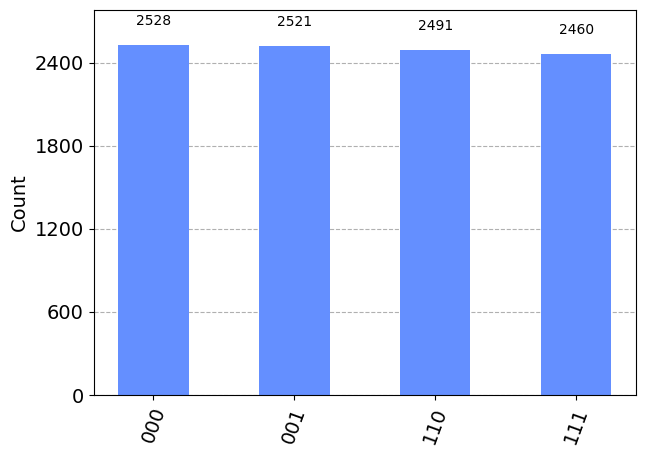

In [19]:
# Let us see the results

simulator = Aer.get_backend('qasm_simulator')
results = execute(simon, backend=simulator, shots=10000).result()
counts = results.get_counts()
plot_histogram(counts)

In [21]:
# Hence, we got four solutions of "x" for the equation p.x = 0 (mod 2) for p = 110

In [23]:
# Infact, we can verify classically that these results do satisfy the equation

def dot_product(p, x):
    px = 0
    for i in range(len(p)):
        px += int(p[i]) * int(x[i])
    return (px % 2) # returns p.x (mod 2)

for x in counts:
    print( '{}.{} = {} (mod 2)'.format(p, x, dot_product(p, x)) )

110.001 = 0 (mod 2)
110.000 = 0 (mod 2)
110.110 = 0 (mod 2)
110.111 = 0 (mod 2)


In [24]:
# We can find "p" from here. Since "000" is trivial, we don't consider it. Let p = p_2 p_1 p_0
# For x=001, (p_2)0 + (p_1)0 + (p_0)1 = 0 which implies p_0 = 0
# For x=110, (p_2)1 + (p_1)1 + (p_0)0 = 0 which implies p_1 + p_2 = 0 (mod 2)
# For x=111, (p_2)1 + (p_1)1 + (p_0)1 = 0 which implies p_0 + p_1 + p_2 = 0 (mod 2),
# but since p_0 = 0, this also implies p_1 + p_2 = 0 (mod 2)
# This implies either p_1 = p_2 = 0 or p_1 = p_2 = 1. But p_1 = p_2 = 0 gives p = 000 which is trivial solution
# So, we get p_1 = p_2 = 1. This means p = 110. Thus, we got the desired value of "p".

In [25]:
# Let us implement the Simon's Algorithm for these the second oracle and check the results

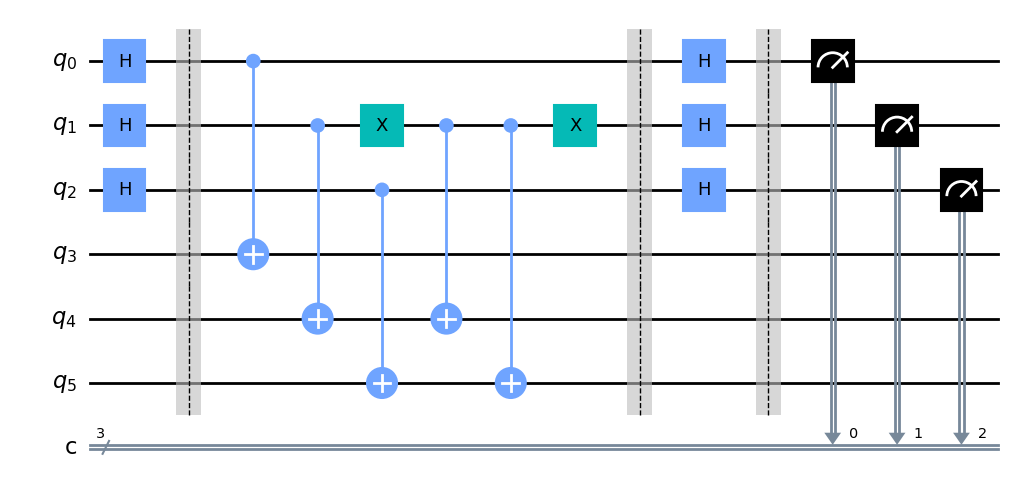

In [28]:
# Implementing Simon's algorithm for Simon oracle-2

n = 3
simon = QuantumCircuit(2*n,n)

# Apply H-gates on input register only
for i in range(n):
    simon.h(i)
simon.barrier()

# Add oracle
simon = simon.compose(simon_oracle_2)
simon.barrier()

# Repeat H-gates on input register
for i in range(n):
    simon.h(i)
simon.barrier()

# Measure
for i in range(n):
    simon.measure(i, i)

# Display circuit
simon.draw()

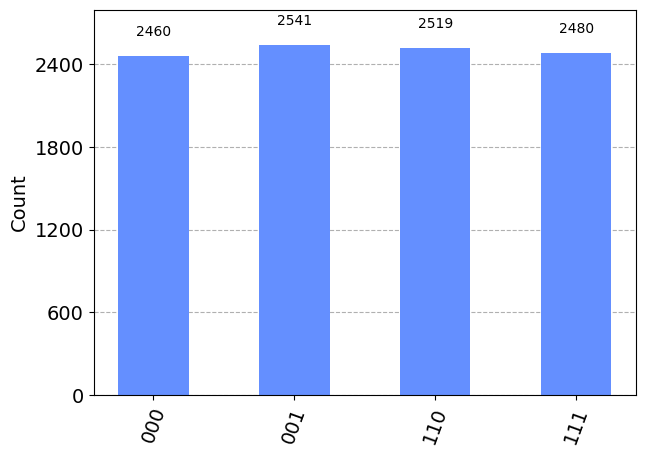

In [29]:
# Let us see the results

simulator = Aer.get_backend('qasm_simulator')
results = execute(simon, backend=simulator, shots=10000).result()
counts = results.get_counts()
plot_histogram(counts)

In [30]:
# Since we get same results as Simon oracle-1, the 2nd oracle also implements the same bit-string p = 110